# XSPEC Interactive Plot Demo
This notebook demonstrates the usage of the `XSPECInteractivePlot` class from the `XiP.py` module. The class provides an interactive interface for visualizing different models and the effects of various parameters on the fit results in XSPEC. 

The `%matplotlib widget` magic command is used to display interactive plots directly within the notebook. Alternatively, `%matplotlib qt` can be used to display the plot in a separate window.

In [27]:
%matplotlib widget 
# %matplotlib qt

# Load the XSPECInteractivePlot class from the XiP script
from XiP import XSPECInteractivePlot

## Data Configuration
Define the configuration for the source and background data files. These files are required for the XSPEC analysis. The source file contains the spectral data of the object being studied, while the background file accounts for the background noise in the observation. Response matrix files (RMF) and ancillary response files (ARF) can be provided separately. If not specified, XSPEC will use default files from the data files.

The [Data](Data) directory contains an example spectrum file, their corresponding RMF and ARF files, and FWC model files for the source and background regions.

> **Note for custom implementation:** 
> - Ensure that the `Dir` key in the `data_config` dictionary is correctly set to the directory where the spectrum files and the Filter Wheel Closed (FWC) model are saved. 
> - The current code is made to work with the FWC model given in the [Data](Data) directory. User may be required to change the code to import their own FWC model depending on the type of model they are using. If other models are used, make sure to have the name as 'model 3:' for `xspec_type='src_bkg'` and 'model 2:' for `xspec_type='bkg'` in the FWC model file (Look at the example FWC model files in the [Data](Data) directory for reference.)

 



In [28]:
data_config = {
    'Dir': 'Data/',
    'src_file': 'SRC_spec820_SourceSpec_00001_corr.fits',
    'bkg_file': 'BKG_spec820_SourceSpec_00001_corr.fits',
    'fwc_data': 'TM8_FWC_c010_mod_customized_src.dat',
    # 'fwc_data': 'TM8_FWC_c010_mod_customized_bkg.dat', # Only when running in xspec_type = 'bkg' 
    # 'rmf': 'BKG_circ_820_RMF_00001.fits',
    # 'arf': 'BKG_circ_820_ARF_00001_corr.fits'
}

## Model Configuration

The `model_config` dictionary defines the configuration for the models used in the XSPEC analysis. It includes keys for model names, initial values for free parameters, and optional legend labels for component model lines. Below is a detailed explanation of its structure and usage:

### Keys in `model_config`

1. **`model_name`**  
    - A string specifying the model name(s) as one does in XSPEC. Example: `'apec+TBabs(apec+apec+powerlaw)'`.
    - For combined source and background models, separate the models with a `|`.  
    - Example: `'TBabs*(vapec)|constant*(apec+TBabs(apec+apec+powerlaw))'`

2. **`param_defaults`**  
    - A list specifying initial values for each free parameter in the model.  
    - Each element can be:
      - A float: The initial value of the parameter.  
      - A tuple: `(initial_value, flag)` where:
         - `flag = -1`: The parameter is frozen to the initial value.  
         - Any other value for `flag` is ignored, and the parameter is free to vary.  
    - **Important**: The number and order of elements must match the free parameters in the XSPEC model. If unsure about the order of free parameters, you can omit the `param_defaults` key initially and set parameters later (explained in the next section).  

3. **`label_list`** *(Optional)*  
    - A list of strings specifying legend labels for the component model lines in the plot.  
    - If not provided, labels are auto-generated based on the format `'model.component_name.parameter_name'`.

In [29]:
model_config = {
    # ----- For xspec_type = 'bkg' -----#
    # 'model_name': 'apec+TBabs(apec+apec+powerlaw)',
    # 'param_defaults': [0.146473, 1, 0.55, 0.169315, 1, 0.407826, 1, (1.46, -1), 1, 9],
    
    #----- For xspec_type = 'src' -----#
    # 'model_name': 'TBabs(apec+powerlaw)',
    # 'param_defaults': [ 0.5, 0.146473, (1), 0.8, 1],
    
    #----- For xspec_type = 'src_bkg' -----#
    'model_name': 'TBabs*(vapec+powerlaw)|constant*(apec+TBabs(apec+apec+powerlaw))',
    'param_defaults': [0.55, 0.1, 1, 1,1, 1, (0.112061, -1), (3.61109E-02, -1), (0.195980, -1), (0.855378, -1), 
                       (7.93382E-03, -1), (0.251422, -1), (1.88310E-02, -1), (1.46, -1), (1.72098E-02, -1), (14,1)],
    
    # 'label_list': [r"$\mathrm{apec_{src}}$", r"$\mathrm{apec_{LHB}}$", r"$\mathrm{apec_{MWH}}$", r"$\mathrm{apec_{Corona}}$", r"$\mathrm{powerlaw}$"]
}

## Initialize the Plotter
Create an instance of the `XSPECInteractivePlot` class with the data and model configurations. This instance will be used for plotting and fitting the data. The `xspec_type` parameter specifies the type of data being analyzed, such as source-only (`src`), background-only (`bkg`), or both (`src_bkg`).

### Usage Scenarios

1. **Source Model Only**  
    - `xspec_type = 'src'`  
    - The model applies to source data only, ignoring background data.  
    - Useful for exploring different models and parameter configurations.

2. **Background Model Only**  
    - `xspec_type = 'bkg'`  
    - The model applies to background data only and it uses the filter wheel closed (FWC) model to model the instrumental background. Define only the astrophysical model for the background data.

3. **Source and Background Model**  
    - `xspec_type = 'src_bkg'`  
    - This mode is used when one wants to fit both source and background data simultaneously. Provide both the source and background spectrum files, and the model should be defined to include both components separated by a `|`.
    - Example: `'TBabs*(vapec)|constant*(apec+TBabs(apec+apec+powerlaw))'`.

In [30]:
plotter = XSPECInteractivePlot(data_config, model_config, xspec_type='src_bkg', energy_range=(0.2, 8.0))

### Customizing plotting and fitting options:
After initializing the `XSPECInteractivePlot` instance, you can customize various plotting and fitting options such as:
- **Set XSPEC Chatter**: By default, XSPEC chatter is set to 0 so that XSPEC does not print any output (It still does print the XSPEC output when you set the model). You can set it to higher value using `plotter.chatter = 10` to see the XSPEC output.
- **Perform XSPEC Fit**: By default, the code will run the XSPEC fit with the initial parameters. If you do not want to run the fit, set `plotter.perform_fit = False`.
- **Set binning of the spectrum data**: You can set the binning of the spectrum data as one can do in XSPEC using `plotter.minSig = 10` (default is 20) and `plotter.maxBins = 10` (default is 100). (Read the XSPEC documentation for more details on these parameters).
- **Show background data in `src_bkg` mode**: When using `xspec_type = 'src_bkg'`, the background data points are plotted by default. You can set `plotter.show_bkg_data = False` to hide the background data points.

In [31]:
# plotter.chatter = 10
# plotter.perform_fit = False
plotter.minSig = 10
# plotter.maxBins = 10
# plotter.show_bkg_data = False

## Run the Plotter
Run the plotter to initialize the data and prepare the interactive plot. This step runs all the steps of setting up the data and model, fitting, creating a plot and adding interactive elements. You can play around with the sliders and see how the model changes with the parameters. You can also reset the parameters to their initial values (or fit values if you have run the fit) using the reset button. The range for sliders are set using $value \pm (3\times value)$. Incase the range is above or below the limits of the parameter in XSPEC, the slider will be set to the limits of the parameter in XSPEC. 


***Warning: The file sent to Xset.restore(): Data//TM8_FWC_c010_mod_customized_src.dat
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.




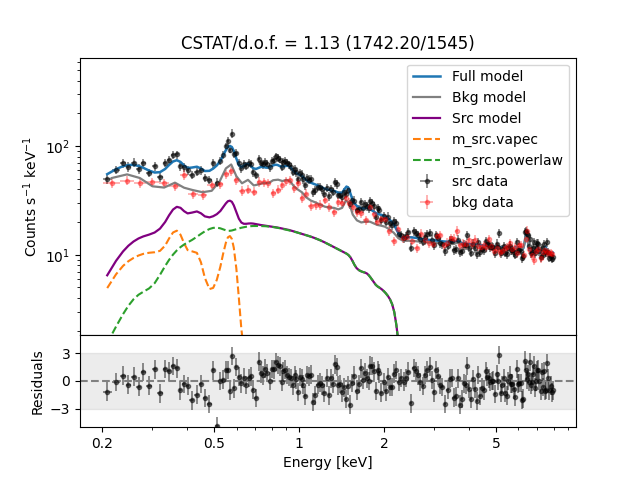

In [32]:
plotter.run()

## Helper for setting initial values
If you are unsure about the order of the free parameters in your model, you can run the `set_param_helper` function to display this information. This will also help you see which model component requires legend labels while setting the `label_list` in the `model_config`.

In [33]:
plotter.set_param_helper()


***Warning: The file sent to Xset.restore(): Data//TM8_FWC_c010_mod_customized_src.dat
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.


Following parameters are free:
------------------------------------------------------------------------------------
No.     Model          Component           Parameter           Bounds                        
------------------------------------------------------------------------------------
1       m_src          TBabs               nH                  [     0. 100000.]             
2       m_src          vapec               kT                  [ 0.0808 68.447 ]             
3       m_src          vapec               norm                [0.e+00 1.e+20]               
4       m_src          powerlaw            PhoIndex            [-3.  9.]                     
5       m_src          powerlaw            norm 

## Adjusting Model Parameters
Most likely, you would want to adjust the model parameters like unfreezing some parameters or linking them. To do so, first you can call the `set_model` function to set the data and model in XSPEC based on the configuration. Then you can make changes based on your requirements. Few examples are provided below.

In [34]:
# It is better to run the XSPECInteractivePlot agin to not have errors later.
plotter = XSPECInteractivePlot(data_config, model_config, xspec_type='src_bkg', energy_range=(0.2, 8.0))
plotter.minSig = 10

plotter.set_model()

# Use plotter.model.component.parameter format to access parameters
# There are 3 models set. Namely m_src, m_bkg, and m_fwc
plotter.m_src.vapec.C.frozen = False
plotter.m_src.vapec.N.frozen = False
plotter.m_src.vapec.O.frozen = False
plotter.m_src.vapec.Ne.frozen = False
plotter.m_src.vapec.Mg.frozen = False

plotter.m_bkg.TBabs.nH.link = plotter.m_src.TBabs.nH

# Do not forget to add initial guesses for the new unfrozen parameters in correct order and to remove the parameter for m_bkg.TBabs.nH since it is linked to m_src.TBabs.nH and is no longer needed.
plotter.param_defaults = [0.55, 0.1, 1,1,1,1,1, 1, 1,1, 1, (0.112061, -1), (3.61109E-02, -1), (0.855378, -1), 
                       (7.93382E-03, -1), (0.251422, -1), (1.88310E-02, -1), (1.46, -1), (1.72098E-02, -1), 9]


***Warning: The file sent to Xset.restore(): Data//TM8_FWC_c010_mod_customized_src.dat
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.




## Run with Updated Model
Apply the updated model parameters and re-run the plotter to visualize the changes. This function performs the same steps as the `run` function but with the updated model parameters. 

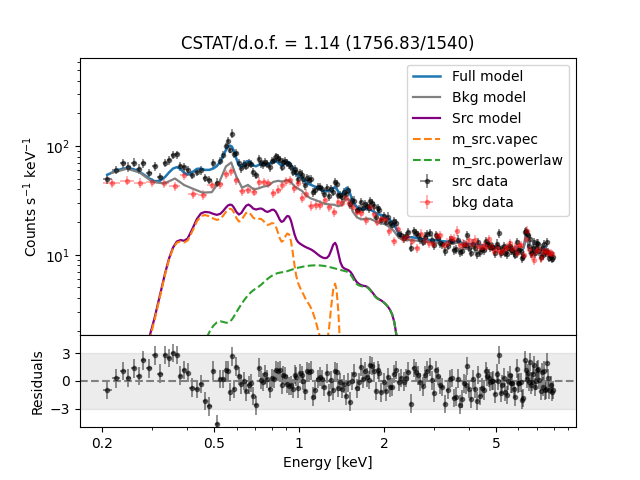

In [35]:
plotter.run_with_updated_model()